In [52]:
!jt -t solarizedd

In [1]:
'''
dev-v5_ocean_optics_proj.ipynb
trying to do things with API, THREDDS to netCDF which goes into xarray Dataset
had lots of trouble doing this, just even plotting it
@author TEJ
@date 2023-02-23 - 2023-03-13
'''
import numpy as np
import pandas as pd 
import xarray as xr
import netCDF4 as nc
import datetime as dt
from matplotlib import pyplot as plt 
import seaborn as sns
import urllib.request
import datetime

import erddapClient as erd


In [2]:
#defining palettes

#               black    purple     blue        cyan       green    chartreuse  orange     red
#                         412       443         490         510        555       620        683
colors_black = ["00000","#7b00e2", "#001bff", "#00ffff", "#00ff00", "#b3ff00", "#ff7700", "#ff0000"]
pal_black = sns.color_palette(colors_black)

colors = ["#7b00e2", "#001bff", "#00ffff", "#00ff00", "#b3ff00", "#ff7700", "#ff0000"]
pal = sns.color_palette(colors)


colors_r = ["#ff0000", "#ff7700", "#b3ff00", "#00ff00", "#00ffff", "#001bff", "#7b00e2"]
pal_r = sns.color_palette(colors_r)

In [3]:
#defining relevant lists (for iteration)
wavelengthnm_list = ["spectir_412nm","spectir_443nm","spectir_490nm","spectir_510nm","spectir_555nm","spectir_620nm","spectir_683nm"]
wavelength_list_int = [413,443,490,510,555,620,683]
wavelength_list = ["412","443","490","510","555","620","683"]
wavelengthqc_agg_list = ["spectir_412nm_qc_agg","spectir_443nm_qc_agg","spectir_490nm_qc_agg","spectir_510nm_qc_agg","spectir_555nm_qc_agg","spectir_620nm_qc_agg","spectir_683nm_qc_agg"]
mooring_list = ["or_inshore", "or_shelf","wa_inshore","wa_shelf"]
data_id_list = ["ooi-ce01issp-sp001-07-spkirj000", "ooi-ce02shsp-sp001-06-spkirj000", 
                "ooi-ce06issp-sp001-07-spkirj000", "ooi-ce07shsp-sp001-06-spkirj000"]

In [4]:
#read in 8 filtered datasets using pandas
or_inshore_fails=pd.read_csv("{}_fails.csv".format(mooring_list[0]))
or_shelf_fails=pd.read_csv("{}_fails.csv".format(mooring_list[1]))
wa_inshore_fails=pd.read_csv("{}_fails.csv".format(mooring_list[2]))
wa_shelf_fails=pd.read_csv("{}_fails.csv".format(mooring_list[3]))

or_inshore_nans=pd.read_csv("{}_nans.csv".format(mooring_list[0]))
or_shelf_nans=pd.read_csv("{}_nans.csv".format(mooring_list[1]))
wa_inshore_nans=pd.read_csv("{}_nans.csv".format(mooring_list[2]))
wa_shelf_nans=pd.read_csv("{}_nans.csv".format(mooring_list[3]))

In [5]:
#altering time col                                           everyrow,o=0th col
#(pandas:)or_inshore_fails["time"] vs (numpy:)or_inshore_fails_np[ :,0]
or_inshore_fails["time"] = pd.to_datetime(or_inshore_fails["time"])
or_shelf_fails["time"] = pd.to_datetime(or_shelf_fails["time"])
wa_inshore_fails["time"] = pd.to_datetime(wa_inshore_fails["time"])
wa_shelf_fails["time"] = pd.to_datetime(wa_shelf_fails["time"])

or_inshore_nans["time"] = pd.to_datetime(or_inshore_nans["time"])
or_shelf_nans["time"] = pd.to_datetime(or_shelf_nans["time"])
wa_inshore_nans["time"] = pd.to_datetime(wa_inshore_nans["time"])
wa_shelf_nans["time"] = pd.to_datetime(wa_shelf_nans["time"])

In [6]:
wa_shelf_nans.time[1]

Timestamp('2015-04-09 23:25:00+0000', tz='UTC')

In [227]:
#decrepit
#numpy kick: i am abandoning bc plotting it happier w pandas????
# i am returning to the numpy which lets us make netcdfs
#creating dtype tuples for naming cols within arrays and assigning data type

dtype = [('time', "np.datetime64"), ('depth', 'float64'), ('wavelength', 'str'), ('spectir','float64')]
#array = np.array(arraylist, dtype=dtype)
or_inshore_fails_np = np.array(or_inshore_fails)#,dtype=dtype)
or_shelf_fails_np = or_shelf_fails.to_numpy()
wa_inshore_fails_np = wa_inshore_fails.to_numpy()
wa_shelf_fails_np = wa_shelf_fails.to_numpy()

or_inshore_nans_np = or_inshore_nans.to_numpy()
or_shelf_nans_np = or_shelf_nans.to_numpy()
wa_inshore_nans_np = wa_inshore_nans.to_numpy()
wa_shelf_nans_np = wa_shelf_nans.to_numpy()
or_inshore_nans_np[:,0]

array([Timestamp('2014-04-17 22:28:00+0000', tz='UTC'),
       Timestamp('2014-04-17 22:28:00+0000', tz='UTC'),
       Timestamp('2014-04-17 22:28:00+0000', tz='UTC'), ...,
       Timestamp('2022-09-27 07:53:00+0000', tz='UTC'),
       Timestamp('2022-09-27 07:53:00+0000', tz='UTC'),
       Timestamp('2022-09-27 07:53:00+0000', tz='UTC')], dtype=object)

In [7]:
or_inshore_fails_np[:,0] = or_inshore_fails_np[:,0].astype("datetime64")
or_shelf_fails_np[:,0] = or_shelf_fails_np[:,0].astype("datetime64")
wa_inshore_fails_np[:,0] = wa_inshore_fails_np[:,0].astype("datetime64")
wa_shelf_fails_np[:,0] = wa_shelf_fails_np[:,0].astype("datetime64")

or_shelf_nans_np[:,0] = or_shelf_nans_np[:,0].astype("datetime64")
or_inshore_nans_np[:,0] = or_inshore_nans_np[:,0].astype("datetime64")
wa_shelf_nans_np[:,0] = wa_shelf_nans_np[:,0].astype("datetime64")
wa_inshore_nans_np[:,0] = wa_inshore_nans_np[:,0].astype("datetime64")

NameError: name 'or_inshore_fails_np' is not defined

In [210]:
#unnamed array?
fails_array = np.array([or_inshore_fails_np, 
                        or_shelf_fails_np,
                        wa_inshore_fails_np,
                        wa_shelf_fails_np],dtype=object)

In [212]:
#dictionary?
fails_array = {'or_inshore_fails_np':or_inshore_fails_np, 
               'or_shelf_fails_np':or_shelf_fails_np,
               "wa_inshore_fails_np":wa_inshore_fails_np,
               'wa_shelf_fails_np':wa_shelf_fails_np
              }

In [8]:
fails_array['or_inshore_fails_np'][:,0]

NameError: name 'fails_array' is not defined

In [221]:
fails_xr = xr.DataArray(fails_array)
fails_xr

<xarray.DataArray ()>
array(<built-in method values of dict object at 0x7fb70e5f7dc0>,
      dtype=object)

In [214]:
nans_array = np.array([or_inshore_nans_np, 
                        or_shelf_nans_np,
                        wa_inshore_nans_np,
                        wa_shelf_nans_np],dtype=object)

In [215]:
b = np.datetime64('2005-02-25')
b

numpy.datetime64('2005-02-25')

In [218]:
#try ooi method below. feb 28

In [217]:
lat = np.arange(-90, 91, 1)
lon = np.arange(-180, 181, 1)
time = np.arange(0, 365, 1)
data1 = np.random.rand(len(time), len(lat), len(lon))

In [ ]:
#from chat gcpt
import numpy as np
from netCDF4 import Dataset

# Define the dimensions of the arrays
lat = np.arange(-90, 91, 1)
lon = np.arange(-180, 181, 1)
time = np.arange(0, 365, 1)

# Define the data arrays
data1 = np.random.rand(len(time), len(lat), len(lon))
data2 = np.random.rand(len(time), len(lat))
data3 = np.random.rand(len(lat), len(lon))

# Create a new NetCDF file
with Dataset('output.nc', 'w') as ncfile:

    # Define the dimensions in the NetCDF file
    ncfile.createDimension('lat', len(lat))
    ncfile.createDimension('lon', len(lon))
    ncfile.createDimension('time', len(time))

    # Define the variables and their dimensions in the NetCDF file
    lat_var = ncfile.createVariable('lat', np.float32, ('lat',))
    lon_var = ncfile.createVariable('lon', np.float32, ('lon',))
    time_var = ncfile.createVariable('time', np.int32, ('time',))
    data1_var = ncfile.createVariable('data1', np.float32, ('time', 'lat', 'lon',))
    data2_var = ncfile.createVariable('data2', np.float32, ('time', 'lat',))
    data3_var = ncfile.createVariable('data3', np.float32, ('lat', 'lon',))

    # Write the data to the NetCDF file
    lat_var[:] = lat
    lon_var[:] = lon
    time_var[:] = time
    data1_var[:] = data1
    data2_var[:] = data2
    data3_var[:] = data3


Spectral Irradiance by Depth for or_inshore_fails n=133


# plotting ventures

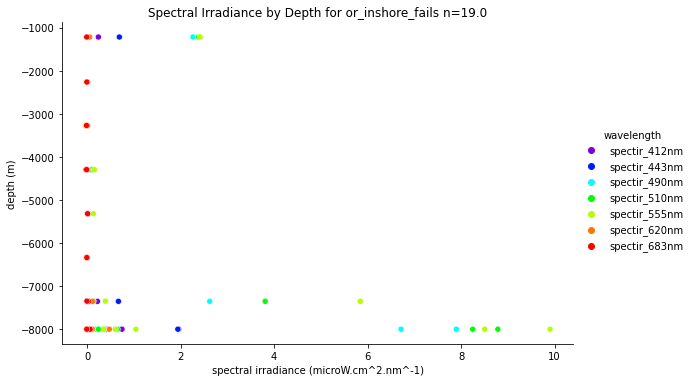

In [11]:
sns.relplot(data=or_inshore_fails, x='spectir', y='z', hue='wavelength', 
            hue_order=wavelengthnm_list, palette = pal, aspect=1.61)

plt.xlabel("spectral irradiance (microW.cm^2.nm^-1)")
plt.ylabel("depth (m)")
plt.title("Spectral Irradiance by Depth for or_inshore_fails n={}".format(len(or_inshore_fails)/7))
plt.savefig("fails_or_inshore_spectir_scatter.png", dpi=600)
plt.show()

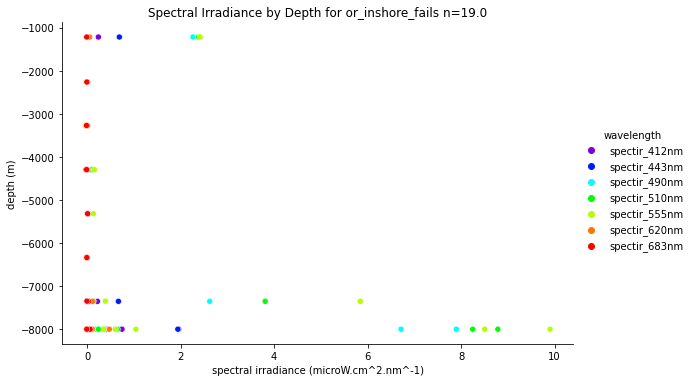

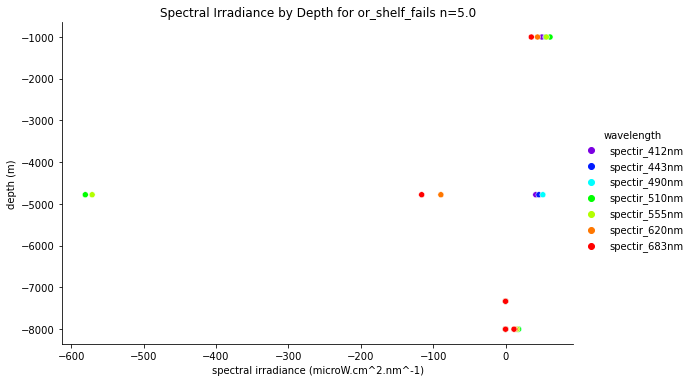

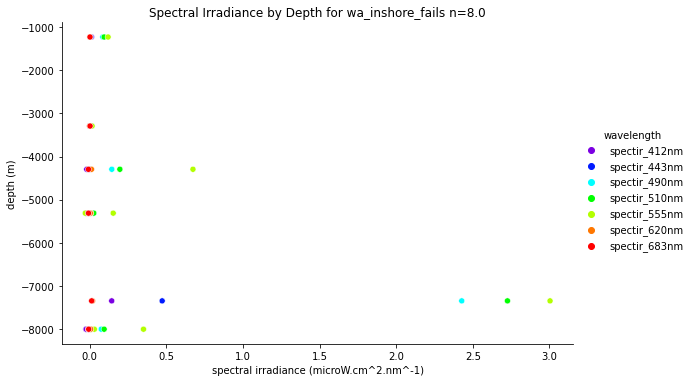

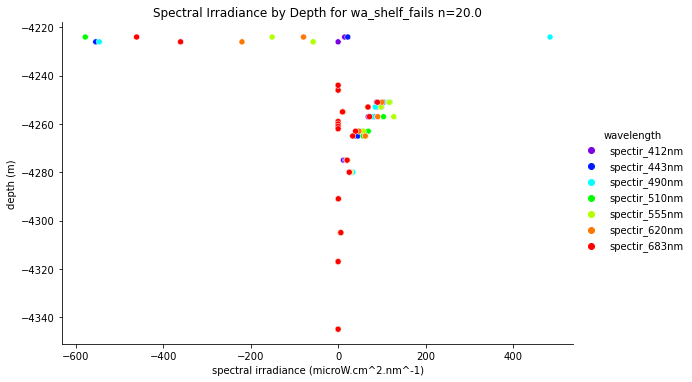

In [10]:
#plotting spectral irradiance by depth: see outliers
#first for the fails

sns.relplot(data=or_inshore_fails, x='spectir', y='z', hue='wavelength', 
            hue_order=wavelengthnm_list, palette = pal, aspect=1.61)

plt.xlabel("spectral irradiance (microW.cm^2.nm^-1)")
plt.ylabel("depth (m)")
plt.title("Spectral Irradiance by Depth for or_inshore_fails n={}".format(len(or_inshore_fails)/7))
plt.savefig("fails_or_inshore_spectir_scatter.png", dpi=600)
plt.show()

sns.relplot(data=or_shelf_fails, x='spectir', y='z', hue='wavelength', 
            hue_order=wavelengthnm_list, palette = pal, aspect=1.61)
plt.xlabel("spectral irradiance (microW.cm^2.nm^-1)")
plt.ylabel("depth (m)")
plt.title("Spectral Irradiance by Depth for or_shelf_fails n={}".format(len(or_shelf_fails)/7))
plt.savefig("fails_or_shelf_spectir_scatter.png", dpi=600)
plt.show()

sns.relplot(data=wa_inshore_fails, x='spectir', y='z', hue='wavelength', 
            hue_order=wavelengthnm_list, palette = pal, aspect=1.61)
plt.xlabel("spectral irradiance (microW.cm^2.nm^-1)")
plt.ylabel("depth (m)")
plt.title("Spectral Irradiance by Depth for wa_inshore_fails n={}".format(len(wa_inshore_fails)/7))
plt.savefig("fails_wa_inshore_spectir_scatter.png", dpi=600)
plt.show()

sns.relplot(data=wa_shelf_fails, x='spectir', y='z', hue='wavelength', 
            hue_order=wavelengthnm_list, palette = pal, aspect=1.61)
plt.xlabel("spectral irradiance (microW.cm^2.nm^-1)")
plt.ylabel("depth (m)")
plt.title("Spectral Irradiance by Depth for wa_shelf_fails n={}".format(len(wa_shelf_fails)/7))
plt.savefig("fails_wa_shelf_spectir_scatter.png", dpi=600)
plt.show()

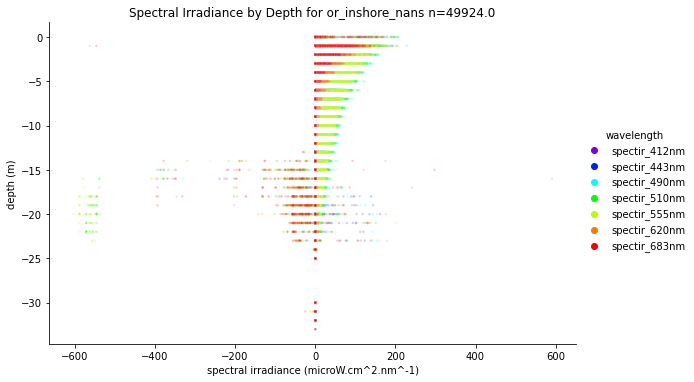

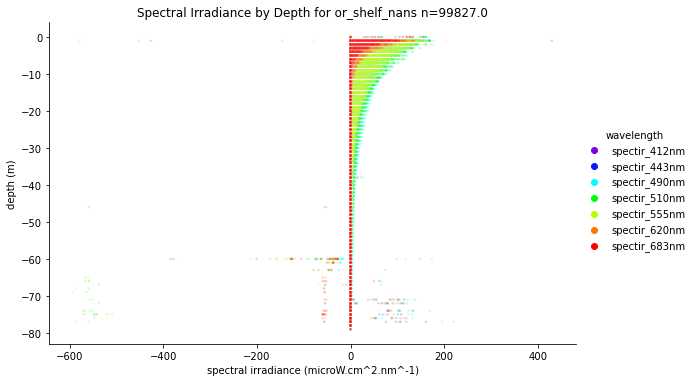

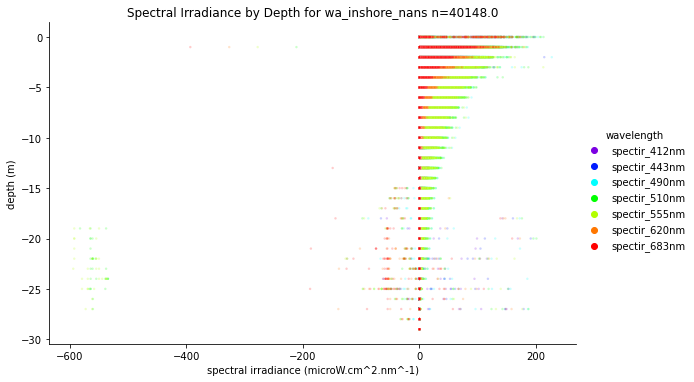

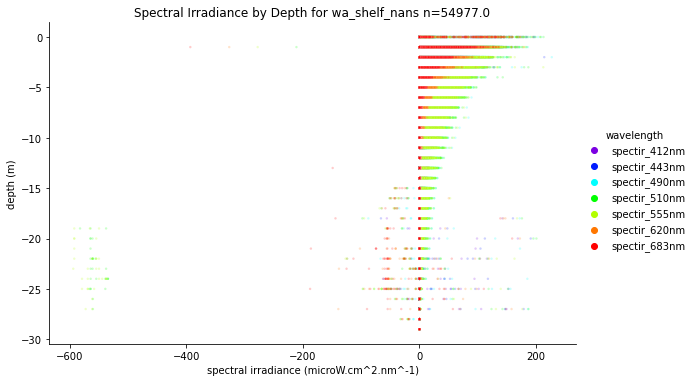

In [97]:
#spectral irradiance by depth for nans: heftier datasets
sns.relplot(data=or_inshore_nans, x='spectir', y='z', 
            hue='wavelength', hue_order=wavelengthnm_list, palette = pal, aspect=1.61, 
            s=6, edgecolors=None, alpha = 0.2)
plt.xlabel("spectral irradiance (microW.cm^2.nm^-1)")
plt.ylabel("depth (m)")
plt.title("Spectral Irradiance by Depth for or_inshore_nans n={}".format(len(or_inshore_nans)/7))
plt.savefig("nans_or_inshore_spectir_scatter.png", dpi=600)
plt.show()

sns.relplot(data=or_shelf_nans, x='spectir', y='z', 
            hue='wavelength', hue_order=wavelengthnm_list, palette = pal, aspect=1.61,
            s=6, edgecolors=None, alpha = 0.2)
plt.xlabel("spectral irradiance (microW.cm^2.nm^-1)")
plt.ylabel("depth (m)")
plt.title("Spectral Irradiance by Depth for or_shelf_nans n={}".format(len(or_shelf_nans)/7))
plt.savefig("nans_or_shelf_spectir_scatter.png", dpi=600)
plt.show()

sns.relplot(data=wa_inshore_nans, x='spectir', y='z', 
            hue='wavelength', hue_order=wavelengthnm_list, palette = pal, aspect=1.61,
            s=6, edgecolors=None, alpha = 0.2)
plt.xlabel("spectral irradiance (microW.cm^2.nm^-1)")
plt.ylabel("depth (m)")
plt.title("Spectral Irradiance by Depth for wa_inshore_nans n={}".format(len(wa_inshore_nans)/7))
plt.savefig("nans_wa_inshore_spectir_scatter.png", dpi=600)
plt.show()

sns.relplot(data=wa_inshore_nans, x='spectir', y='z', 
            hue='wavelength', hue_order=wavelengthnm_list, palette = pal, aspect=1.61,
            s=6, edgecolors=None, alpha = 0.2)
plt.xlabel("spectral irradiance (microW.cm^2.nm^-1)")
plt.ylabel("depth (m)")
plt.title("Spectral Irradiance by Depth for wa_shelf_nans n={}".format(len(wa_shelf_nans)/7))
plt.savefig("nans_wa_shelf_spectir_scatter.png", dpi=600)
plt.show()

KeyboardInterrupt: 

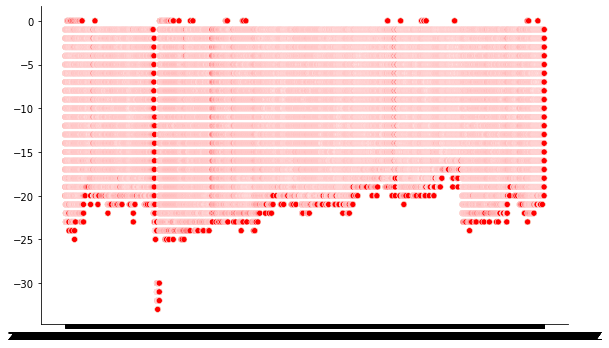

In [20]:
#trying to plot z by time
#i think unsuccessful sofar bc. of treatment of time axis in timestamp which is bad
sns.relplot(data=or_inshore_nans, x='time', y='z', hue='wavelength', hue_order=wavelengthnm_list, palette = pal, aspect=1.61)
plt.xlabel("time")
plt.ylabel("depth (z)")
plt.title("z by time(Timestamp) for or_inshore_nans")
plt.show()

sns.relplot(data=or_shelf_nans, x='time', y='z', hue='wavelength', hue_order=wavelengthnm_list, palette = pal, aspect=1.61)
plt.xlabel("time")
plt.ylabel("depth (z)")
plt.title("z by time(Timestamp) for or_shelf_nans")

plt.show()

sns.relplot(data=wa_inshore_nans, x='time', y='z', hue='wavelength', hue_order=wavelengthnm_list, palette = pal, aspect=1.61)
plt.xlabel("time")
plt.ylabel("depth (z)")
plt.title("z by time(Timestamp) by Depth for wa_inshore_nans")
plt.show()

sns.relplot(data=wa_inshore_nans, x='time', y='z', hue='wavelength', hue_order=wavelengthnm_list, palette = pal, aspect=1.61)
plt.xlabel("time")
plt.ylabel("depth (z)")
plt.title("z by time(Timestamp) by Depth for wa_shelf_nans")
plt.xlim(Timestamp(2017))
plt.show()

this is not very nice. date is in TimeStamp form which people think is bad. I will try to convert to pd datetime

see below 3/2

In [175]:
or_inshore_fails['time'].min()

Timestamp('2015-09-17 20:12:00+0000', tz='UTC')

In [75]:
or_inshore_fails

,time,z,wavelength,spectir
0,2015-09-17 20:12:00+00:00,-8000.0,spectir_412nm,-0.017592
1,2015-09-18 08:12:00+00:00,-8000.0,spectir_412nm,-0.017745
2,2015-09-18 14:06:00+00:00,-6337.0,spectir_412nm,-0.018088
3,2016-07-26 14:24:00+00:00,-4296.0,spectir_412nm,-0.027279
4,2016-08-01 08:25:00+00:00,-3272.0,spectir_412nm,-0.030519
...,...,...,...,...
128,2019-06-30 02:20:00+00:00,-7349.0,spectir_683nm,-0.005305
129,2019-07-03 08:03:00+00:00,-2262.0,spectir_683nm,-0.006806
130,2019-07-21 20:03:00+00:00,-8000.0,spectir_683nm,0.063196
131,2020-09-14 20:12:00+00:00,-1217.0,spectir_683nm,-0.009825


In [74]:
means = or_inshore_fails.mean()
stds = or_inshore_fails.std()

<ipython-input-74-6eefe166ae55>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  means = or_inshore_fails.mean()


In [ ]:


# calculate the upper and lower limits for each column
upper_limits = means + 3*stds
lower_limits = means - 3*stds

# filter the rows that have values within the upper and lower limits for all columns
filtered_df = df.loc[(df <= upper_limits) & (df >= lower_limits)].dropna()

# print the filtered dataframe
print(filtered_df)

# 28 feb 
lets do itttt
https://github.com/ooi-data-review/2018-data-workshops/blob/master/chemistry/examples/quickstart_python.ipynb

retrieve multiple datasets at once? merge netcdfs? slay

In [13]:
import requests
import os
import re

!pip install dask

In [14]:
API_USERNAME = 'OOIAPI-CW7R6SO6XQ1FXJ'
API_TOKEN = 'TEMP-TOKEN-JRRU4IA04CGLH4'

In [15]:
SENSOR_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'
r = requests.get(SENSOR_BASE_URL, auth=(API_USERNAME, API_TOKEN))
print( r.status_code) #this means status: good
print( r.headers )
print( r.encoding )
print( r.text )
#print( r.json() )

200
{'Server': 'nginx', 'Date': 'Tue, 14 Mar 2023 01:32:27 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Strict-Transport-Security': 'max-age=63072000', 'X-Frame-Options': 'SAMEORIGIN', 'X-XSS-Protection': '1; mode=block'}
utf-8
[ "CE01ISSM", "CE01ISSP", "CE02SHBP", "CE02SHSM", "CE02SHSP", "CE04OSBP", "CE04OSPD", "CE04OSPI", "CE04OSPS", "CE04OSSM", "CE05MOAS", "CE06ISSM", "CE06ISSP", "CE07SHSM", "CE07SHSP", "CE09OSPM", "CE09OSSM", "CP01CNPM", "CP01CNSM", "CP01CNSP", "CP02PMCI", "CP02PMCO", "CP02PMUI", "CP02PMUO", "CP03ISPM", "CP03ISSM", "CP03ISSP", "CP04OSPM", "CP04OSSM", "CP05MOAS", "GA01SUMO", "GA02HYPM", "GA03FLMA", "GA03FLMB", "GA05MOAS", "GI01SUMO", "GI02HYPM", "GI03FLMA", "GI03FLMB", "GI05MOAS", "GP02HYPM", "GP03FLMA", "GP03FLMB", "GP05MOAS", "GS01SUMO", "GS02HYPM", "GS03FLMA", "GS03FLMB", "GS05MOAS", "RS01OSBP", "RS01SBPD", "RS01SBPS", "RS01SHBP", "RS01SHDR", "RS01SLBS", "RS01SUM1", "RS01SUM2", "RS03ASHS", "RS03AXBS", "RS0

In [16]:
# A quick function to make an API request and print the results
def get_and_print_api(url):
  r = requests.get(url, auth=(API_USERNAME, API_TOKEN))
  data = r.json()
  for d in data:
    print( d )

In [17]:
#now tunneling into API directories
#for use in determining path for request
print("node:")
get_and_print_api(SENSOR_BASE_URL+'/CE01ISSP')
print("\n")
print("sensors:")
get_and_print_api(SENSOR_BASE_URL+'/CE01ISSP/SP001')
print("\n")
print("methods:")
get_and_print_api(SENSOR_BASE_URL+'/CE01ISSP/SP001/07-SPKIRJ000')
print("\n")
print("data streams: ")
get_and_print_api(SENSOR_BASE_URL+'/CE01ISSP/SP001/07-SPKIRJ000/recovered_cspp/')

node:
SP001


sensors:
00-SPPENG000
02-DOSTAJ000
04-OPTAAJ000
05-VELPTJ000
06-NUTNRJ000
07-SPKIRJ000
08-FLORTJ000
09-CTDPFJ000
10-PARADJ000


methods:
recovered_cspp


data streams: 
spkir_abj_cspp_instrument_recovered
spkir_abj_cspp_metadata_recovered


In [18]:
# my instrument
#these variables are CASE SENSITIVE
site = 'CE01ISSP'
node = 'SP001'
instrument = '07-SPKIRJ000'
method = 'recovered_cspp'
stream = 'spkir_abj_cspp_instrument_recovered'

api_base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'

# Create the request URL
data_request_url ='/'.join((api_base_url,site,node,instrument,method,stream))
     
params = {
  'format':'application/netcdf',

}
#synchronous: json smaller
#asynchronous: netcdf bigger

#example Instrument Information
site = 'CP04OSSM'
node = 'SBD11'
instrument = '06-METBKA000'
method = 'telemetered'
stream = 'metbk_a_dcl_instrument'

api_base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'

#Create the request URL
data_request_url ='/'.join((api_base_url,site,node,instrument,method,stream))

#another example thing
#Instrument Information
site = 'GP03FLMB'
node = 'RIM01'
instrument = '02-CTDMOG060'
method = 'telemetered'
stream = 'ctdmo_ghqr_sio_mule_instrument'

data_request_url ='/'.join((SENSOR_BASE_URL,site,node,instrument,method,stream))

params = {
  'beginDT':'2016-10-01T00:00:00.000Z',
  'endDT':'2016-11-01T00:00:00.000Z',
  'limit':1000,   
}

In [19]:
#doing synchronous request
r = requests.get(data_request_url, params=params, auth=(API_USERNAME, API_TOKEN))
data = r.json()
data

{'requestUUID': 'e7b69b46-57f2-4884-97d3-8c62b269304f',
 'outputURL': 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/turner.e.johnson@gmail.com/20230314T013241008Z-CE01ISSP-SP001-07-SPKIRJ000-recovered_cspp-spkir_abj_cspp_instrument_recovered/catalog.html',
 'allURLs': ['https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/turner.e.johnson@gmail.com/20230314T013241008Z-CE01ISSP-SP001-07-SPKIRJ000-recovered_cspp-spkir_abj_cspp_instrument_recovered/catalog.html',
  'https://downloads-west.oceanobservatories.org/async_results/turner.e.johnson@gmail.com/20230314T013241008Z-CE01ISSP-SP001-07-SPKIRJ000-recovered_cspp-spkir_abj_cspp_instrument_recovered'],
 'sizeCalculation': 147021169,
 'timeCalculation': 60,
 'numberOfSubJobs': 1543}

In [24]:
requests.get(data['allURLs'][1] + '/status.txt')
#404 means not ready yet, 200 means ready ! :) should also get an email

<Response [200]>

In [25]:
#from allURLs above
url = 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/turner.e.johnson@gmail.com/20230301T044607127Z-CE01ISSP-SP001-07-SPKIRJ000-recovered_cspp-spkir_abj_cspp_instrument_recovered/catalog.html'

In [26]:
#finding all nc directories
#each one corresponds with a "deployment"
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
datasets

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/turner.e.johnson@gmail.com/20230301T044607127Z-CE01ISSP-SP001-07-SPKIRJ000-recovered_cspp-spkir_abj_cspp_instrument_recovered/deployment0020_CE01ISSP-SP001-07-SPKIRJ000-recovered_cspp-spkir_abj_cspp_instrument_recovered_20220715T193449.710000-20220927T075331.181000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/turner.e.johnson@gmail.com/20230301T044607127Z-CE01ISSP-SP001-07-SPKIRJ000-recovered_cspp-spkir_abj_cspp_instrument_recovered/deployment0019_CE01ISSP-SP001-07-SPKIRJ000-recovered_cspp-spkir_abj_cspp_instrument_recovered_20220415T220006.567000-20220516T122054.930000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/turner.e.johnson@gmail.com/20230301T044607127Z-CE01ISSP-SP001-07-SPKIRJ000-recovered_cspp-spkir_abj_cspp_instrument_recovered/deployment0018_CE01ISSP-SP001-07-SPKIRJ000-recovered_cspp-spkir_abj_cspp_instrument_recovered_20210629T162451.397000-20210711T080402.840000.nc',
 'https://

In [27]:
len(datasets) #number of "deploymnets"

20

In [56]:
ds = xr.open_mfdataset(datasets[5:9])
#ds = ds.swap_dims({'obs': 'time'}) # Swap the primary dimension
#ds = ds.chunk({'time': 100}) # Used for optimization
#chunking data has to do with how data is stored in memory, using the dask library to 
#organize big data in a series of numpy arrays
ds = ds.sortby('time') # Data from different deployments can overlap so we want to sort all data by time stamp.

In [72]:
print(ds)

<xarray.Dataset>
Dimensions:                            (obs: 5019, spectra: 7)
Coordinates:
  * obs                                (obs) int64 0 1 2 3 ... 5016 5017 5018
    lat                                (obs) float64 dask.array<chunksize=(5019,), meta=np.ndarray>
    lon                                (obs) float64 dask.array<chunksize=(5019,), meta=np.ndarray>
  * spectra                            (spectra) int32 0 1 2 3 4 5 6
    depth                              (obs) float64 dask.array<chunksize=(5019,), meta=np.ndarray>
    time                               (obs) datetime64[ns] dask.array<chunksize=(5019,), meta=np.ndarray>
Data variables:
    internal_temperature               (obs) float32 dask.array<chunksize=(5019,), meta=np.ndarray>
    driver_timestamp                   (obs) datetime64[ns] dask.array<chunksize=(5019,), meta=np.ndarray>
    id                                 (obs) |S64 dask.array<chunksize=(5019,), meta=np.ndarray>
    provenance                   

For deployments 5-9, there are 5019 entries in time dimension and 7 entries in spectra dimension.
- *a dictionary mapping from dimension names to the fixed length of each dimension*

Coordinates: Array vs chunk? descriptive with datatype, range, arraytype
- array/lists of all different possible entries in cols
- spectral data is indexed by 1d array 0 to 6, associated with λ list
- time is actual array of times
- *a dict-like container of DataArrays intended to label points used in data_vars (e.g., arrays of numbers, datetime objects or strings)*

Variables:
- *another dict-like container of DataArrays corresponding to variables*

Attributes: metadata irrelevant
- *dict to hold arbitrary metadata*




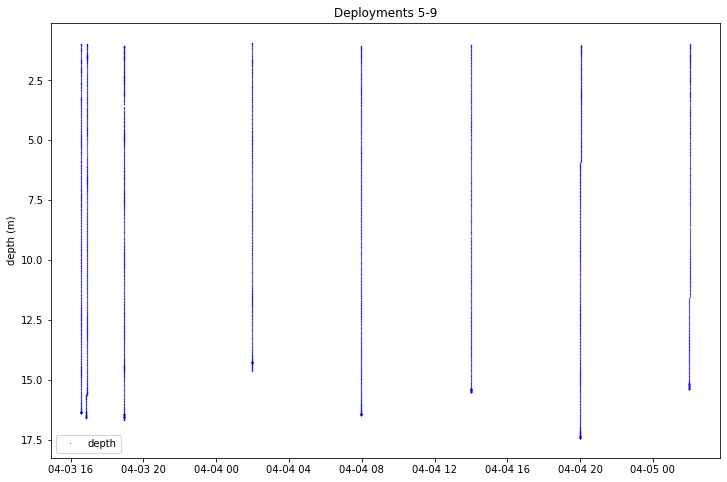

In [29]:
fig, (ax) = plt.subplots(1,1, figsize=(12,8))
plt.plot(ds['time'],ds['depth'], 'b.', markersize=.5, label='depth')
#plt.plot(ds['time'],ds['spectra'][0], 'g.', markersize=2, label='Air Temperature')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.title("Deployments 5-9")
plt.legend()
#plt.savefig("init_deployments_15-20.png",dpi=500)

Text(0.5, 1.0, 'Deployments 5-9 unchunked ')

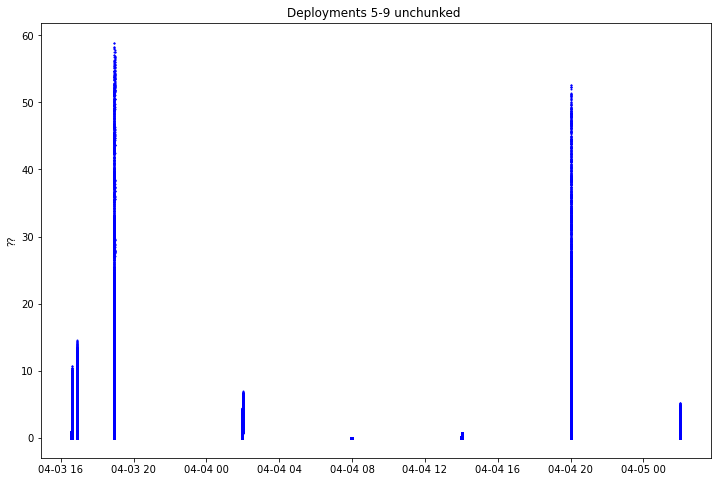

In [352]:
fig, (ax) = plt.subplots(1,1, figsize=(12,8))
plt.plot(ds["time"],ds["spkir_abj_cspp_downwelling_vector"], 'b.', markersize=2)#, label=(wavelengthnm_list))
#plt.plot(ds['time'],ds['spectra'][0], 'g.', markersize=2, label='Air Temperature')
plt.ylabel('??')
plt.title("Deployments 5-9 unchunked ")
#plt.legend();

In [71]:
print(ds.spectra[6].values)
print(ds.lon[100].values) 

6
-124.091917


In [ ]:
ta_CBR = ta.sel(lat=-35.28, lon=149.13, method='nearest')
ta_CBR.sel(plev=85000).plot()

Text(0, 0.5, 'depth (m)')

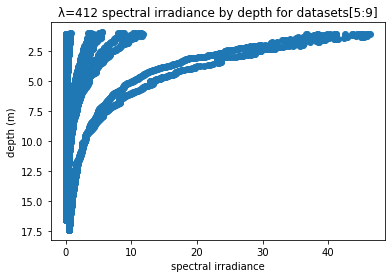

In [68]:
ds.spkir_abj_cspp_downwelling_vector.shape
ds.spkir_abj_cspp_downwelling_vector.coords
#we want to plot this and hue by spectra dimension
plt.scatter(ds.spkir_abj_cspp_downwelling_vector[:,0], y=ds.depth)
plt.gca().invert_yaxis()
plt.title("λ=412 spectral irradiance by depth for datasets[5:9]")
plt.xlabel("spectral irradiance")
plt.ylabel("depth (m)")

In [114]:
nm412 = ds.sel(spectra=0)
nm443 = ds.sel(spectra=1)
nm490 = ds.sel(spectra=2)
nm510 = ds.sel(spectra=3)
nm555 = ds.sel(spectra=4)
nm620 = ds.sel(spectra=5)
nm683 = ds.sel(spectra=6)

In [117]:
print(nm412.spkir_abj_cspp_downwelling_vector.values)

[0.05937866 0.05889536 0.05889536 ... 3.83958877 3.54490719 3.40053389]


Text(3, 20, "this is super f'd up")

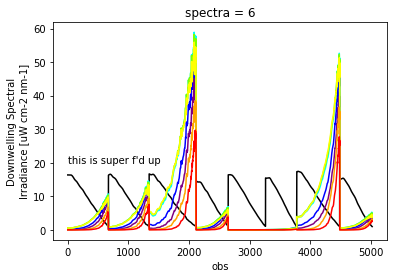

In [73]:
nm412["depth"].plot(color="black")

nm412["spkir_abj_cspp_downwelling_vector"].plot(color="purple")
nm443["spkir_abj_cspp_downwelling_vector"].plot(color="blue")
nm490["spkir_abj_cspp_downwelling_vector"].plot(color="cyan")
nm510["spkir_abj_cspp_downwelling_vector"].plot(color="chartreuse")
nm555["spkir_abj_cspp_downwelling_vector"].plot(color="yellow")
nm620["spkir_abj_cspp_downwelling_vector"].plot(color="orange")
nm683["spkir_abj_cspp_downwelling_vector"].plot(color="red")
plt.text(3,20,"this is super f'd up")

No handles with labels found to put in legend.


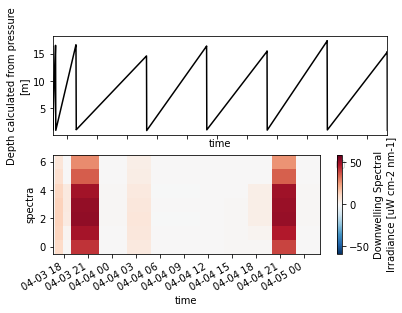

In [254]:
#ds.spkir_abj_cspp_downwelling_vector.plot(x="time", hue=spectra)
fig, axs = plt.subplots(nrows=2, sharex=True)
ds.depth.plot(ax=axs[0], color="k")
ds["spkir_abj_cspp_downwelling_vector"].plot(x="time")

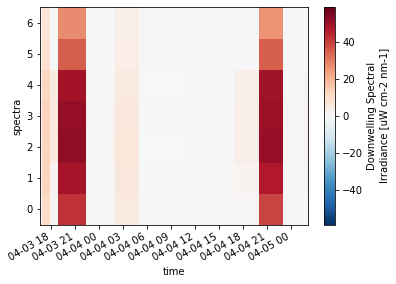

In [84]:
ds.spkir_abj_cspp_downwelling_vector.plot(x="time")
#plt.text("why is -40 on the scale")
#I want to have depth on yax, hue is spectral irradiance, facet wrapped by wavelength

# 3/2 datetime task for CSVs

In [236]:
# Time Processing Routine
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)

In [235]:
or_inshore_nans["time"]

NameError: name 'or_inshore_nans' is not defined

In [101]:
or_inshore_nans["time"] = pd.to_datetime(or_inshore_nans["time"])

# 3/6 plotting john's green sticks
We want to facet wrap by wavelength.a quick google search
https://docs.xarray.dev/en/stable/generated/xarray.plot.FacetGrid.html

In [237]:
ds[[0]]

KeyError: 0

TypeError: cannot directly convert an xarray.Dataset into a numpy array. Instead, create an xarray.DataArray first, either with indexing on the Dataset or by invoking the `to_array()` method.

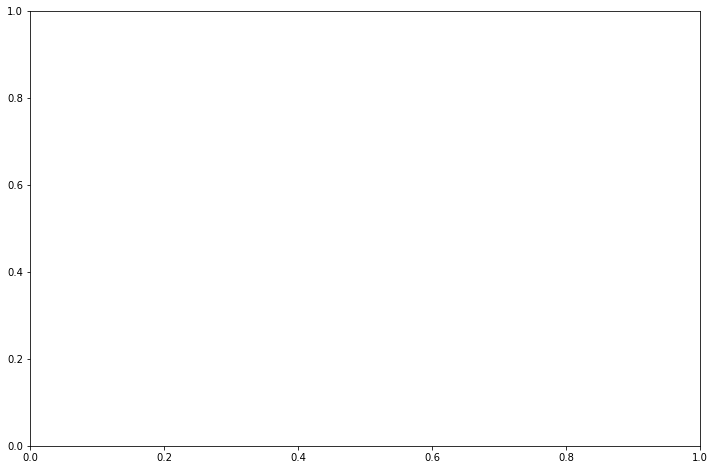

In [164]:
fig, (ax) = plt.subplots(1,1, figsize=(12,8))
plt.plot(ds['time'],ds['depth'], 'b.', markersize=.5, label='depth')
#plt.plot(ds['time'],ds['spectra'][0], 'g.', markersize=2, label='Air Temperature')
plt.gca().invert_yaxis()
plt.ylabel('depth (m)')
plt.title("Deployments 5-9")
plt.legend()
#plt.savefig("init_deployments_15-20.png",dpi=500)

#adapted from previous v4
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(ds, col ="wavelength", hue="wavelength",  palette=pal, aspect=.4, height=5)
#g.map(sns.lineplot, "spectir", "z")
g.map(plt.fill_between, "spectir","z")
g.fig.suptitle(title)
g.set_titles("")
g.set(xticks=[], xlabel="")
g.despine(bottom=True, left=True)
#g.map(label, "spectir")
#g.set(ylabel="depth (m)") #leaving this off bc it currenly labels all 7 plots.

In [ ]:
oneD412 = ds.isel(lat=10, lon=10)

air1d.plot()

In [2]:
xr.plot.FacetGrid(ds, col=None, row="spectra", 
                      col_wrap=None, sharex=True, sharey=False, 
                      figsize=None, aspect=1, size=3, subplot_kws=None)

NameError: name 'xr' is not defined

In [234]:
ds.spkir_abj_cspp_downwelling_vector.plot(x="time",y)

SyntaxError: positional argument follows keyword argument (<ipython-input-234-462926991a31>, line 1)

In [233]:
ds.plot(x='time', y='spkir_abj_cspp_downwelling_vector', col='spectra', col_wrap=3)

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [113]:
var_mean1 = ds.sel(spectra=0)['spkir_abj_cspp_downwelling_vector'].mean() 
var_mean2 = ds['spkir_abj_cspp_downwelling_vector'].sel(spectra=0).mean() 
print(var_mean1.values)
print(var_mean2.values)

3.6401724205211057
3.6401724205211057


this is cool so either way is good. now a for loop to get mean and std for each spectra element

In [128]:
nm412 = ds.sel(spectra=0)
nm443 = ds.sel(spectra=1)
nm490 = ds.sel(spectra=2)
nm510 = ds.sel(spectra=3)
nm555 = ds.sel(spectra=4)
nm620 = ds.sel(spectra=5)
nm683 = ds.sel(spectra=6)

sigma2_bounds = []
sigma3_bounds = []
masks2 = []
masks3 = []

for i in range(0,7):
    mean = ds.sel(spectra=i)['spkir_abj_cspp_downwelling_vector'].mean()
    std = ds.sel(spectra=i)['spkir_abj_cspp_downwelling_vector'].std()

    lower_bound2 = mean - 2 * std
    upper_bound2 = mean + 2 * std
    
    lower_bound3 = mean - 3 * std
    upper_bound3 = mean + 3 * std
    
    sigma2_bounds.append(tuple([lower_bound2, upper_bound2]))
    sigma3_bounds.append(tuple([lower_bound3, upper_bound3]))
    
    mask2 = (spkir_abj_cspp_downwelling_vector < lower_bound) | (spkir_abj_cspp_downwelling_vector > upper_bound)
    

In [243]:
import dask.array as da
from dask.array import mean, std

mean = ds["spkir_abj_cspp_downwelling_vector"].mean(dim="spectra")
std = ds["spkir_abj_cspp_downwelling_vector"].std(dim="spectra")

# Compute the threshold
threshold = mean + 3 * std


# Create a mask that identifies rows with values above the threshold
mask = ds["spkir_abj_cspp_downwelling_vector"] > threshold

# Drop the rows identified by the mask
ds_filtered = ds.drop(mask.any(dim="spectra"))

TypeError: unhashable type: 'DataArray'

In [228]:
arr_filtered.compute()

array([[ 0.49725898, -0.98947382, -0.57963597, ..., -1.36843494,
         0.65197466,  1.1324713 ],
       [ 1.96315197, -0.95420604,  1.1432789 , ..., -1.09233937,
        -0.91544142, -1.21929957],
       [-2.0418724 ,  1.82914085, -0.70702757, ..., -0.56000864,
        -2.25765339,  0.4905646 ],
       ...,
       [ 0.30657313,  1.98918896, -1.26875985, ...,  0.55436565,
         0.7862858 , -0.74205989],
       [ 0.38887998,  2.05554291, -2.09308435, ...,  1.32834334,
         0.03425247, -0.72239087],
       [-0.73461351, -0.28901357, -0.1750539 , ..., -1.23817057,
        -1.32456091, -1.05746264]])

In [201]:

mean = ds.sel(spectra=0)['spkir_abj_cspp_downwelling_vector'].compute().mean(skipna=True).item()
std = ds.sel(spectra=0)['spkir_abj_cspp_downwelling_vector'].compute().mean(skipna=True).item()
upper_bound3 = mean + 3 * std
mask2 = (ds.spkir_abj_cspp_downwelling_vector < 0) | (ds.spkir_abj_cspp_downwelling_vector > upper_bound3)

In [202]:
mask2.sel(spectra=0).values

array([False, False, False, ..., False, False, False])

In [209]:
mean = ds.sel(spectra=0)["spkir_abj_cspp_downwelling_vector"].compute().mean(skipna=True).item()
std = ds.sel(spectra=0)["spkir_abj_cspp_downwelling_vector"].compute().std(skipna=True).item()
print(mean,std)
mask = ds.spkir_abj_cspp_downwelling_vector > (mean + 3*std)

# Mask out these values by replacing them with NaN
masked_data = ds.spkir_abj_cspp_downwelling_vector.where(~mask, other=float('nan'))
masked_data.values



# Create a mask array
mask = ds.spkir_abj_cspp_downwelling_vector.where(ds > mean + 3 * std, True, False)

# Remove the masked out rows
arr_filtered = ds.spkir_abj_cspp_downwelling_vector.compress(~mask.any(axis=1), ds, axis=0)

3.6401724205211057 7.71668813292845


TypeError: '>' not supported between instances of 'Array' and 'float'

The code std = ds.sel(dim=0)["variable"].compute().std().item() computes the standard deviation of a dask array in an xarray dataset.

Here's what each part of the code does:

* ds.sel(dim=0) selects a subset of the dataset along the first dimension. This returns a new xarray dataset with the same variables as the original dataset, but with the first dimension reduced to a single point.
["variable"] selects a specific variable from the reduced dataset. This returns a DataArray object representing the values of that variable at the single point along the first dimension.
* compute() triggers computation of the dask array. This causes the dask array to be evaluated and converted to a numpy array. This step is necessary because the standard deviation calculation requires access to all the data.
* std() calculates the standard deviation of the data. This returns a numpy scalar representing the standard deviation.
* item() extracts the standard deviation value as a Python scalar. This is necessary because the standard deviation value is stored as a numpy scalar, which cannot be used directly in some Python operations.
Overall, this code is equivalent to computing the standard deviation of the entire ds["variable"] dask array, but with an intermediate step of reducing the dataset along the first dimension.

In [193]:
filtered_ds = ds.where(~mask2).dropna(dim='spectra', how='all')

In [194]:
filtered_ds

<xarray.Dataset>
Dimensions:                            (obs: 5019, spectra: 7)
Coordinates:
  * obs                                (obs) int64 0 1 2 3 ... 5016 5017 5018
    lat                                (obs) float64 dask.array<chunksize=(5019,), meta=np.ndarray>
    lon                                (obs) float64 dask.array<chunksize=(5019,), meta=np.ndarray>
  * spectra                            (spectra) int32 0 1 2 3 4 5 6
    depth                              (obs) float64 dask.array<chunksize=(5019,), meta=np.ndarray>
    time                               (obs) datetime64[ns] dask.array<chunksize=(5019,), meta=np.ndarray>
Data variables:
    internal_temperature               (obs, spectra) float32 dask.array<chunksize=(5019, 7), meta=np.ndarray>
    driver_timestamp                   (obs, spectra) datetime64[ns] dask.array<chunksize=(5019, 7), meta=np.ndarray>
    id                                 (obs, spectra) object dask.array<chunksize=(5019, 7), meta=np.ndarray>
    provenance                         (obs, spectra) object dask.array<chunksize=(5019, 7), meta=np.ndarray>
    internal_timestamp                 (obs, spectra) datetime64[ns] dask.array<chunksize=(5019, 7), meta=np.ndarray>
    frame_counter                      (obs, spectra) float32 dask.array<chunksize=(5019, 7), meta=np.ndarray>
    profiler_timestamp                 (obs, spectra) datetime64[ns] dask.array<chunksize=(5019, 7), meta=np.ndarray>
    vin_sense                          (obs, spectra) float32 dask.array<chunksize=(5019, 7), meta=np.ndarray>
    ingestion_timestamp                (obs, spectra) datetime64[ns] dask.array<chunksize=(5019, 7), meta=np.ndarray>
    port_timestamp                     (obs, spectra) datetime64[ns] dask.array<chunksize=(5019, 7), meta=np.ndarray>
    sample_delay                       (obs, spectra) float32 dask.array<chunksize=(5019, 7), meta=np.ndarray>
    pressure                           (obs, spectra) float32 dask.array<chunksize=(5019, 7), meta=np.ndarray>
    deployment                         (obs, spectra) float64 dask.array<chunksize=(5019, 7), meta=np.ndarray>
    pressure_qc_results                (obs, spectra) float64 dask.array<chunksize=(5019, 7), meta=np.ndarray>
    pressure_qc_executed               (obs, spectra) float64 dask.array<chunksize=(5019, 7), meta=np.ndarray>
    preferred_timestamp                (obs, spectra) object dask.array<chunksize=(5019, 7), meta=np.ndarray>
    va_sense                           (obs, spectra) float32 dask.array<chunksize=(5019, 7), meta=np.ndarray>
    timer                              (obs, spectra) float64 dask.array<chunksize=(5019, 7), meta=np.ndarray>
    suspect_timestamp                  (obs, spectra) float32 dask.array<chunksize=(5019, 7), meta=np.ndarray>
    spkir_abj_cspp_downwelling_vector  (obs, spectra) float64 dask.array<chunksize=(5019, 7), meta=np.ndarray>
    channel_array                      (obs, spectra) float64 dask.array<chunksize=(5019, 7), meta=np.ndarray>
Attributes:
    _NCProperties:                      version=1|netcdflibversion=4.6.1|hdf5...
    node:                               SP001
    comment:                            
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  recovered_cspp
    stream:                             spkir_abj_cspp_instrument_recovered
    featureType:                        point
    creator_email:                      
    publisher_name:                     Ocean Observatories Initiative
    date_modified:                      2023-03-01T04:47:56.579586
    keywords:                           
    cdm_data_type:                      Point
    references:                         More information can be found at http...
    Metadata_Conventions:               Unidata Dataset Discovery v1.0
    date_created:                       2023-03-01T04:47:56.579583
    id:             

In [238]:
sigma2_bounds

[(<xarray.DataArray 'spkir_abj_cspp_downwelling_vector' ()>
  dask.array<sub, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
  Coordinates:
      spectra  int32 0,
  <xarray.DataArray 'spkir_abj_cspp_downwelling_vector' ()>
  dask.array<add, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
  Coordinates:
      spectra  int32 0),
 (<xarray.DataArray 'spkir_abj_cspp_downwelling_vector' ()>
  dask.array<sub, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
  Coordinates:
      spectra  int32 1,
  <xarray.DataArray 'spkir_abj_cspp_downwelling_vector' ()>
  dask.array<add, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
  Coordinates:
      spectra  int32 1),
 (<xarray.DataArray 'spkir_abj_cspp_downwelling_vector' ()>
  dask.array<sub, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
  Coordinates:
      spectra  int32 2,
  <xarray.DataArray 'spkir_abj_cspp_downwelling_vector' ()>
  dask.array<add, shape=(), dtype

In [126]:
list

[(1, 2), (4, 6)]

In [9]:
ds

NameError: name 'ds' is not defined